In [1]:
# import libraries

import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import mediapipe as mp


mp_face_detction = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [2]:
# load img

img = cv2.imread("../imgs/happygirl.jpg")

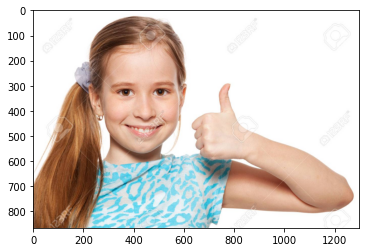

In [3]:
# show img converted to rgb

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
# run deepface model

prediction = DeepFace.analyze(img, enforce_detection=False)
prediction

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]   


{'region': {'x': 281, 'y': 147, 'w': 296, 'h': 418},
 'emotion': {'angry': 1.060690868470715e-07,
  'disgust': 5.467645531888029e-13,
  'fear': 1.5134619252288317e-09,
  'happy': 99.76980090141296,
  'sad': 2.3850223129784354e-06,
  'surprise': 1.1879627281885519e-07,
  'neutral': 0.2301969099789858},
 'dominant_emotion': 'happy',
 'age': 25,
 'gender': 'Woman',
 'race': {'asian': 12.021926045417786,
  'indian': 0.29449304565787315,
  'black': 0.032410919084213674,
  'white': 69.80242729187012,
  'middle eastern': 3.1432103365659714,
  'latino hispanic': 14.705534279346466},
 'dominant_race': 'white'}

In [5]:
# DeepFace.analyze returns a dict, so we can access directly the "dominant_emotion" key

prediction["dominant_emotion"]

'happy'

In [6]:
# load haar cascade

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

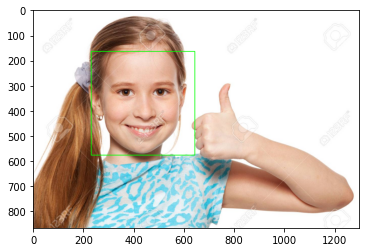

In [7]:
# draw rectangle around face using the haar cascade to detect

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

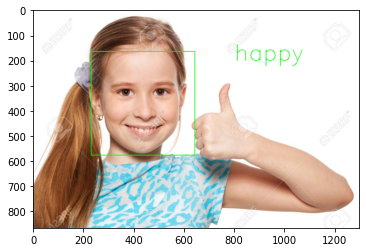

In [8]:
# add "dominant_emotion" text to the img

font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, prediction["dominant_emotion"], (800,200), font, 3, (0, 255, 0), 2, cv2.LINE_4)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]   


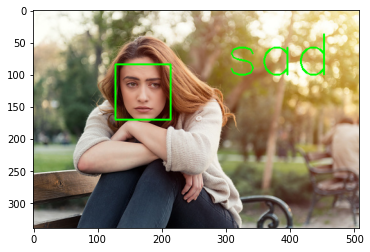

In [9]:
# trying to do the same with sad img

img = cv2.imread("../imgs/sadgirl.jpg")

prediction = DeepFace.analyze(img, enforce_detection=False)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.putText(img, prediction["dominant_emotion"], (300,100), font, 3, (0, 255, 0), 2, cv2.LINE_4)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
# real time video emotion recognition

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.putText(frame, result['dominant_emotion'], (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)

    cv2.imshow('Live video', frame)
    if cv2.waitKey(5) & 0xFF == 27:
      break

cap.release()
cv2.destroyAllWindows()

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]   
